Name: Mrinal Misra

Roll: 121CS0132

In [27]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
# from tensorflow.keras.datassets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD,Adam,Nadam,AdamW
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import RandomSearch, GridSearch, BayesianOptimization

In [2]:
print(np.__version__)

1.24.4


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

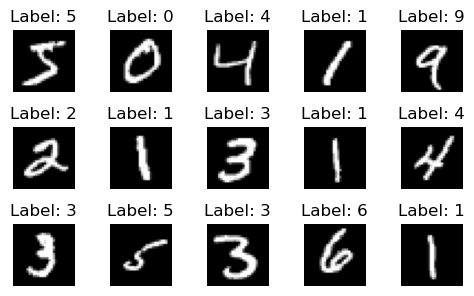

In [6]:
plt.figure(figsize=(5,5))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [7]:
X_trn = train_images[:1000]
y_trn = train_labels[:1000]
X_tst = test_images[:500]
y_tst = test_labels[:500]


In [9]:
X_trn.shape,y_trn.shape,X_tst.shape,y_tst.shape

((1000, 28, 28), (1000,), (500, 28, 28), (500,))

1) . Implement convolutional neural network (CNN) models with following specifications
using TensorFlow for classifying the MNIST dataset. Train the model on the MNIST
training set and evaluate its performance on the test set. Write modularized code and
call it 3 times and compute the mean of test accuracy for each of the following 3
Sequential models.

a. Model-1: Add a convolution layer with 32 3 × 3 filters with stride 2 and relu
activation. Add a maxpooling layer with kernel size 2 × 2 with stride 1. Add a
convolution layer with 16 4 × 4 filters with stride 2 and relu activation. Add a
maxpooling layer with kernel size 4 × 4 with stride 2. Flatten the output and
add a fully connected layer with 8 neurons with relu activation. Add a fully
connected layer with 10 neurons and softmax activation. Use Adam optimizer
with batch size 128, learning rate 0.01 and epochs set to 5.


In [29]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), strides=(2, 2), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Conv2D(16, (4, 4), strides=(2, 2), activation="relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2)))

model.add(Flatten())

model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 5, 5, 16)          8208      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 1, 1, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                

In [30]:
# Number of times to call the model
num_calls = 3
# List to store test accuracies
test_accuracies = []
for i in range(num_calls):
    print("step: ",i+1)
    # Define, compile, and train the model
    adam_optimizer = Adam(learning_rate=0.01)  
    model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_trn, y_trn, batch_size=128, epochs=5)
    # Evaluate the model on test data
    _, test_accuracy = model.evaluate(X_tst, y_tst,verbose=0)
    # Append test accuracy to the list
    test_accuracies.append(test_accuracy)
    # Compute the mean of test accuracies
mean_test_accuracy = np.mean(test_accuracies)
print("Mean Test Accuracy:", mean_test_accuracy)

step:  1
Epoch 1/5
8/8 [==============================] - 1s 20ms/step - loss: 22.3398 - accuracy: 0.1000
Epoch 2/5
8/8 [==============================] - 0s 20ms/step - loss: 2.7119 - accuracy: 0.0850
Epoch 3/5
8/8 [==============================] - 0s 21ms/step - loss: 2.3068 - accuracy: 0.1160
Epoch 4/5
8/8 [==============================] - 0s 19ms/step - loss: 2.3055 - accuracy: 0.1140
Epoch 5/5
8/8 [==============================] - 0s 18ms/step - loss: 2.3037 - accuracy: 0.1170
step:  2
Epoch 1/5
8/8 [==============================] - 1s 19ms/step - loss: 2.3030 - accuracy: 0.1160
Epoch 2/5
8/8 [==============================] - 0s 20ms/step - loss: 2.3146 - accuracy: 0.1220
Epoch 3/5
8/8 [==============================] - 0s 17ms/step - loss: 2.2915 - accuracy: 0.1620
Epoch 4/5
8/8 [==============================] - 0s 16ms/step - loss: 2.1785 - accuracy: 0.2170
Epoch 5/5
8/8 [==============================] - 0s 15ms/step - loss: 2.1038 - accuracy: 0.2200
step:  3
Epoch 1/5
8/

b. Model-2: Add a convolution layer with 32 3 × 3 filters with stride 2 and relu
activation. Add an average pooling layer with kernel size 2 × 2 with stride 1.
Add a convolution layer with 16 4 × 4 filters with stride 2 and relu activation.
Add an average pooling layer with kernel size 4 × 4 with stride 2. Flatten the
output and add a fully connected layer with 8 neurons with relu activation.
Add a fully connected layer with 10 neurons and softmax activation. Use
Adam optimizer with batch size 128, learning rate 0.01 and epochs set to 5.


In [31]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), strides=(2, 2), activation="relu", input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Conv2D(16, (4, 4), strides=(2, 2), activation="relu"))
model.add(AveragePooling2D(pool_size=(4, 4), strides=(2, 2)))

model.add(Flatten())

model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 5, 16)          8208      
                                                                 
 average_pooling2d_3 (Avera  (None, 1, 1, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_5 (Flatten)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                

In [32]:
# Number of times to call the model
num_calls = 3
# List to store test accuracies
test_accuracies = []
for i in range(num_calls):
    print("step: ",i+1)
    # Define, compile, and train the model
    adam_optimizer = Adam(learning_rate=0.01)  
    model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_trn, y_trn, batch_size=128, epochs=5)
    # Evaluate the model on test data
    _, test_accuracy = model.evaluate(X_tst, y_tst,verbose=0)
    # Append test accuracy to the list
    test_accuracies.append(test_accuracy)
# Compute the mean of test accuracies
mean_test_accuracy = np.mean(test_accuracies)
print("Mean Test Accuracy:", mean_test_accuracy)

step:  1
Epoch 1/5
8/8 [==============================] - 1s 13ms/step - loss: 8.6303 - accuracy: 0.1030
Epoch 2/5
8/8 [==============================] - 0s 12ms/step - loss: 2.3811 - accuracy: 0.1010
Epoch 3/5
8/8 [==============================] - 0s 12ms/step - loss: 2.3053 - accuracy: 0.1010
Epoch 4/5
8/8 [==============================] - 0s 12ms/step - loss: 2.3025 - accuracy: 0.0990
Epoch 5/5
8/8 [==============================] - 0s 12ms/step - loss: 2.3019 - accuracy: 0.1030
step:  2
Epoch 1/5
8/8 [==============================] - 1s 12ms/step - loss: 2.3015 - accuracy: 0.1170
Epoch 2/5
8/8 [==============================] - 0s 12ms/step - loss: 2.2998 - accuracy: 0.1170
Epoch 3/5
8/8 [==============================] - 0s 12ms/step - loss: 2.2988 - accuracy: 0.1170
Epoch 4/5
8/8 [==============================] - 0s 12ms/step - loss: 2.2986 - accuracy: 0.1170
Epoch 5/5
8/8 [==============================] - 0s 12ms/step - loss: 2.2987 - accuracy: 0.1170
step:  3
Epoch 1/5
8/8

c. Model-3: Add a convolution layer with 32 3 × 3 filters with stride 2, relu
activation and same padding. Add a maxpooling layer with kernel size 2 × 2
with stride 1. Add a convolution layer with 16 4 × 4 filters with stride 2 and
relu activation. Add a maxpooling layer with kernel size 4 × 4 with stride 2.
Flatten the output and add a fully connected layer with 8 neurons with relu
activation. Add a fully connected layer with 10 neurons and softmax
activation. Use Adam optimizer with batch size 128, learning rate 0.01 and
epochs set to 5.


In [33]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), strides=(2, 2), activation="relu", padding="same", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Conv2D(16, (4, 4), strides=(2, 2), activation="relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2)))

model.add(Flatten())

model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 5, 5, 16)          8208      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 1, 1, 16)          0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 8)                

In [34]:
# Number of times to call the model
num_calls = 3
# List to store test accuracies
test_accuracies = []
for i in range(num_calls):
    print("step: ",i+1)
    # Define, compile, and train the model
    adam_optimizer = Adam(learning_rate=0.01)  
    model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_trn, y_trn, batch_size=128, epochs=5)
    # Evaluate the model on test data
    _, test_accuracy = model.evaluate(X_tst, y_tst,verbose=0)
    # Append test accuracy to the list
    test_accuracies.append(test_accuracy)
    # Compute the mean of test accuracies
mean_test_accuracy = np.mean(test_accuracies)
print("Mean Test Accuracy:", mean_test_accuracy)

step:  1
Epoch 1/5
8/8 [==============================] - 1s 19ms/step - loss: 29.0523 - accuracy: 0.1140
Epoch 2/5
8/8 [==============================] - 0s 19ms/step - loss: 2.3447 - accuracy: 0.1270
Epoch 3/5
8/8 [==============================] - 0s 19ms/step - loss: 2.3045 - accuracy: 0.1160
Epoch 4/5
8/8 [==============================] - 0s 18ms/step - loss: 2.3039 - accuracy: 0.1160
Epoch 5/5
8/8 [==============================] - 0s 19ms/step - loss: 2.3033 - accuracy: 0.1160
step:  2
Epoch 1/5
8/8 [==============================] - 1s 19ms/step - loss: 2.3020 - accuracy: 0.1090
Epoch 2/5
8/8 [==============================] - 0s 18ms/step - loss: 2.2997 - accuracy: 0.1160
Epoch 3/5
8/8 [==============================] - 0s 18ms/step - loss: 2.2990 - accuracy: 0.1160
Epoch 4/5
8/8 [==============================] - 0s 18ms/step - loss: 2.2988 - accuracy: 0.1070
Epoch 5/5
8/8 [==============================] - 0s 19ms/step - loss: 2.2985 - accuracy: 0.1060
step:  3
Epoch 1/5
8/

d. Model-4: Add a convolution layer with 32 3 × 3 filters with stride 2, relu
activation and zero padding. Add a maxpooling layer with kernel size 2 × 2
with stride 1. Add a convolution layer with 16 4 × 4 filters with stride 2, relu
activation and zero padding. Add a maxpooling layer with kernel size 4 × 4
with stride 2. Flatten the output and add a fully connected layer with 8 neurons
with relu activation. Add a fully connected layer with 10 neurons and softmax
-activation. Use Adam optimizer with batch size 128, learning rate 0.01 and
epochs set to 5.

In [44]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), strides=(2, 2), activation="relu", input_shape=(28,28,1)))
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Conv2D(16, (4, 4), strides=(2, 2), activation="relu"))
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2)))

model.add(Flatten())

model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 zero_padding2d (ZeroPaddin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 16)          8208      
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 8, 8, 16)          0         
 ing2D)                                                          
                                                      

In [36]:
# Number of times to call the model
num_calls = 3
# List to store test accuracies
test_accuracies = []
for i in range(num_calls):
    print("step: ",i+1)
    # Define, compile, and train the model
    adam_optimizer = Adam(learning_rate=0.01)  
    model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_trn, y_trn, batch_size=128, epochs=5)
    # Evaluate the model on test data
    _, test_accuracy = model.evaluate(X_tst, y_tst,verbose=0)
    # Append test accuracy to the list
    test_accuracies.append(test_accuracy)
# Compute the mean of test accuracies
mean_test_accuracy = np.mean(test_accuracies)
print("Mean Test Accuracy:", mean_test_accuracy)

step:  1
Epoch 1/5
8/8 [==============================] - 1s 26ms/step - loss: 21.0322 - accuracy: 0.0950
Epoch 2/5
8/8 [==============================] - 0s 25ms/step - loss: 2.3042 - accuracy: 0.1150
Epoch 3/5
8/8 [==============================] - 0s 24ms/step - loss: 2.3012 - accuracy: 0.1160
Epoch 4/5
8/8 [==============================] - 0s 25ms/step - loss: 2.3002 - accuracy: 0.1160
Epoch 5/5
8/8 [==============================] - 0s 24ms/step - loss: 2.2995 - accuracy: 0.1160
step:  2
Epoch 1/5
8/8 [==============================] - 1s 24ms/step - loss: 2.3000 - accuracy: 0.1090
Epoch 2/5
8/8 [==============================] - 0s 21ms/step - loss: 2.2991 - accuracy: 0.1120
Epoch 3/5
8/8 [==============================] - 0s 22ms/step - loss: 2.2987 - accuracy: 0.1160
Epoch 4/5
8/8 [==============================] - 0s 22ms/step - loss: 2.2987 - accuracy: 0.1130
Epoch 5/5
8/8 [==============================] - 0s 24ms/step - loss: 2.2985 - accuracy: 0.1030
step:  3
Epoch 1/5
8/

2. What have you observed from Question 1. Rewrite the Question-1 using kerastuner to
select the best hyperparameters.

In [38]:
 def build_model(hp):
        hp_neurons = hp.Int('neurons', min_value=32, max_value=128, step=32)
        hp_filters = hp.Int('filters', min_value=32, max_value=512, step=32)
        model = Sequential()
        model.add(Conv2D(filters=hp_filters, kernel_size=(3, 3), strides=(2, 2), activation='relu',input_shape=(28,28,1)))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
        model.add(Conv2D(16, kernel_size=(4, 4), strides=(2, 2), activation='relu'))
        model.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2)))
        model.add(Flatten())
        model.add(Dense(units=hp_neurons, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        # Tune learning rate and batch size
        hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.15])
        hp_batch_size = hp.Choice('batch_size', values=[4, 8, 16])
        # Compile the model
        model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
        return model

In [40]:
 # Configure the tuner
tuner = RandomSearch(
build_model,
objective='val_accuracy',
max_trials=3,
executions_per_trial=1,
directory='keras_tuner_a',
project_name='mnist_hyperparameters'
)
hp_batch_size = tuner.oracle.get_space()['batch_size']
tuner.search(X_trn, y_trn, epochs=5, validation_data=(X_tst, y_tst), batch_size=hp_batch_size)

Trial 3 Complete [00h 00m 06s]
val_accuracy: 0.1340000033378601

Best val_accuracy So Far: 0.1340000033378601
Total elapsed time: 00h 00m 30s


In [41]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_neurons = best_hps.get('neurons')
best_filters = best_hps.get('filters')
best_learning_rate = best_hps.get('learning_rate')
best_batch_size = best_hps.get('batch_size')
print(f"Best number of neurons and fillters: {best_neurons,best_filters}")
print(f"Best learning rate: {best_learning_rate}")
print(f"Best batch size: {best_batch_size}")
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
# Evaluate the best model
loss, accuracy = best_model.evaluate(X_tst, y_tst)
print(f"Test accuracy of the best model: {accuracy}")

Best number of neurons and fillters: (96, 96)
Best learning rate: 0.01
Best batch size: 8

16/16 [==============================] - 0s 5ms/step - loss: 2.3005 - accuracy: 0.1340
Test accuracy of the best model: 0.1340000033378601


In [42]:
 best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 96)        960       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 16)          24592     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 96)                1